In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import mlflow
import mlflow.sklearn

In [2]:
credito = pd.read_csv('../data/Credit.csv')
credito.shape

(1000, 21)

In [3]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
def transforma(dataset):
    for col in dataset.columns:
        if dataset[col].dtype == 'object':
            dataset[col] = dataset[col].astype('category').cat.codes

In [5]:
transforma(credito)

In [6]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


In [7]:
X = credito.iloc[:, 0:20].values
y = credito.iloc[:, 20].values

In [8]:
X

array([[ 2,  6,  1, ...,  1,  1,  1],
       [ 1, 48,  3, ...,  1,  0,  1],
       [ 0, 12,  1, ...,  2,  0,  1],
       ...,
       [ 0, 12,  3, ...,  1,  0,  1],
       [ 2, 45,  3, ...,  1,  1,  1],
       [ 1, 45,  1, ...,  1,  0,  1]], shape=(1000, 20))

In [9]:
X_train, X_test, y_train, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [11]:
previsoes = nb.predict(X_test)
acuracia = accuracy_score(y_teste, previsoes)

In [12]:
acuracia

0.6966666666666667

In [13]:
print("Os valores reais no seu y_teste são:", np.unique(y_teste))

Os valores reais no seu y_teste são: [0 1]


In [14]:
matriz = confusion_matrix(y_teste, previsoes, labels=[0, 1])

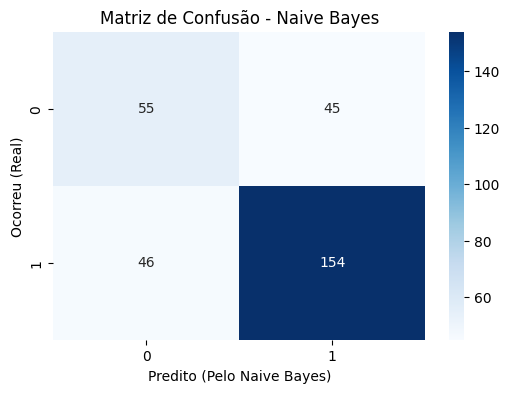

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    matriz, annot=True, cmap='Blues', xticklabels=['0', '1'],
    yticklabels=['0', '1'], fmt='g'
)

plt.xlabel("Predito (Pelo Naive Bayes)")
plt.ylabel("Ocorreu (Real)")
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()